<a href="https://colab.research.google.com/github/Manjari-001/Bike-Demand-Prediction/blob/main/ML_Regression_Capstone__Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

# <b> Problem Description </b>

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing Data Set
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone Projects/Ml_regression_Capston_project/SeoulBikeData.csv"

In [ ]:
df=pd.read_csv(path,encoding='ISO-8859-1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


# Step 1 : Statistical Inference

In [ ]:
#Total Observations
print("rows: ", df.shape[0])

#Total Features
print("columns: ", df.shape[1])

rows:  8760
columns:  14


In [ ]:
df.size

122640

In [ ]:
#Overview of given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### As we see, there are 8760 observations with 14 variables.there is no missing Values present in Dataset.

In [ ]:
#Checking for data types of features given in the dataset
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>

# Data set Information:

- **Date** **:(string)** - Date in year-month-day format
- **Rented Bike count :(integer)** - Number of rented bikes per hour which is the target
- **Hour :(integer)** - Hour of the day 
- **Temperature(°C):(Float)**-Temperature per hour in Celsius
- **Humidity(%) :(integer)** - Humidity in the air in %
- **Wind speed (m/s) :(Float)** - Speed of the wind in m/s
- **Visibility (10m) :(integer)**- Visibility in m
- **Dew point temperature(°C):(Float)** - Temperature at the beggining of the day in Celsius
- **Solar Radiation (MJ/m2):(Float)** - Radiation comes from the Sun
- **Rainfall(mm):(Float)** - Amount of rain in mm
- **Snowfall (cm):(Float)** - Amount of snow in cm
- **Seasons :(string)** - Season of the year -Winter, Spring, Summer, Autumn
- **Holiday :(string)** - If it is holiday or No holiday
- **Functioning Day(string)**: If it is a Functioning Day 

In [ ]:
#Data Description
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**Since Mean(704.6) is not equal to Median(504.5) for target Variable .So, given data is not normalised with respect to Target Variable(Rented Bike Count)**

#  Step 2 : Exploratory Data Analysis

##Data Cleaning

## Checking missing values

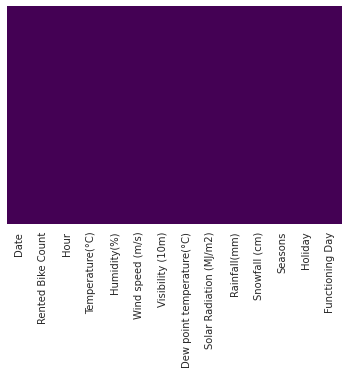

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap='viridis')
plt.show()

In [ ]:
#Checking for Missing Values in given dataset
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

## Checking Outliers

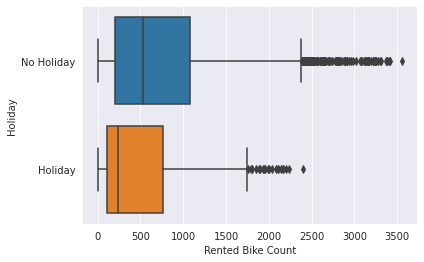

In [ ]:
#Boxplot For Rented Bike Count Vs Holiday
sns.boxplot(x=df["Rented Bike Count"],y=df["Holiday"],data=df)

- ***We can infer from the above boxplot that, the number of bikes rented is more on working days as compared to on holidays.***

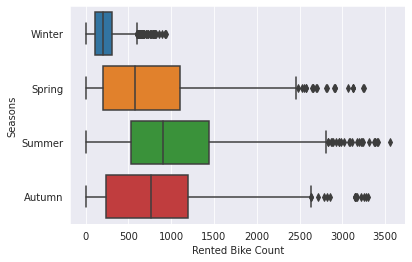

In [ ]:
#Boxplot For Rented Bike Count Vs Seasons
sns.boxplot(x=df["Rented Bike Count"],y=df["Seasons"],data=df)

- ***We can infer from the above boxplot that,the number of Rented Bikes is more in Summer Season followed by Autumn & Spring and Winter being least of all***

In [ ]:
#PairPlot for all features
sns.pairplot(df)

In [ ]:
#Changing Format for Date Variable
df['Date']=pd.to_datetime(df['Date'],format="%d/%m/%Y")
df['Date'].head()

In [ ]:
# Creating new Columns from Date Variable to  Year , Month and Day 
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
df.head()

In [ ]:
# Finding Unique Values for each Variable
df.nunique()

# Data Visualization

In [ ]:
#Histogram for checking the distribution of Temperature 
df['Temperature(°C)'].plot(kind='hist')
plt.show()

- ***We can infer from the above histogram that,distribution of temperature is approximately normally distributed*** 

In [ ]:
#Histogram for checking the distribution of Temperature 
df['Humidity(%)'].plot(kind='hist')
plt.show()

- ***We can infer from the above histogram that,distribution of humidity is slightly negatively skewed *** 

In [ ]:
# Count Plot for Holiday
sns.countplot(x="Holiday", data=df)

In [ ]:
# Count Plot for Year
sns.countplot(x="Year", data=df)
plt.show()

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
Month = df.groupby("Month").sum()
Month.head()

In [ ]:
Month = df.groupby("Month").sum().reset_index()
sns.barplot(x="Month", y="Rented Bike Count", data=Month)
plt.xticks(rotation=90);

In [ ]:
sns.countplot(x="Seasons",data=df)

In [ ]:
Day = df.groupby("Day").sum().reset_index()
sns.barplot(x="Day", y="Rented Bike Count", data=Day)
plt.xticks(rotation=90);

In [ ]:
sns.lineplot(data=df, x="Hour", y="Rented Bike Count", hue="Seasons")
plt.show()

In [ ]:
df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()

In [ ]:
df.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

**Here the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000**

In [ ]:
df['label_day_night']=df['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))
boxplotDay_night= df.boxplot(['Rented Bike Count'],by='label_day_night',figsize=(7,7))

**According to this boxplot there are much more rents during the day than the night**

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)


In [ ]:
plt.figure(figsize=(2,4))
sns.heatmap(df.corr()[["Rented Bike Count"]].sort_values
            (by="Rented Bike Count", ascending=False)[1:],annot=True)
plt.show()

# Model Training:

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn import preprocessing
# from sklearn import linear_model
# from sklearn.metrics import r2_score,mean_squared_error
# from sklearn.linear_model import Ridge
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Lasso
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.preprocessing import StandardScaler

# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from lightgbm import LGBMRegressor

In [ ]:
#Mapping the Variables
df['Functioning Day']=df['Functioning Day'].map({'Yes':1,'No':0})
df['Holiday']=df['Holiday'].map({'No Holiday':0,'Holiday':1})

# One hot encoding
df['Seasons']=pd.get_dummies(df['Seasons'])

## Splitting into X and Y

In [ ]:
df.head()

In [ ]:
X=df.drop(['Rented Bike Count','label_day_night','Date'],axis=1)
y=df['Rented Bike Count']

In [ ]:
X.head()

# Training & Testing data set 

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# df["Seasons"]=le.fit_transform(df["Seasons"])
# df["Holiday"]=le.fit_transform(df["Holiday"])
# df["Functioning Day"]=le.fit_transform(df["Functioning Day"])

In [ ]:
df.head()

In [ ]:
def create_model(model):
    model.fit(xtrain, ytrain)
    ypred= model.predict(xtest)
    print(f"Model Name -: {model}")
    print(f"MAE -: {mae(ytest, ypred)}")
    print(f"MSE -: {mse(ytest, ypred)}")
    print(f"RMSE -: {np.sqrt(mse(ytest, ypred))}")
    print(f"Adj R^2 -: {1-(1-model.score(xtest,ytest))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1)}")
    print( f"Accuracy-: {r2_score(ytest, ypred)}")

# Linear Regression

In [ ]:
linreg=LinearRegression()
create_model(linreg)

# Decision Tree Regressor

In [ ]:
dt=DecisionTreeRegressor()
create_model(dt)

In [ ]:
# Hyper Parameter Tunning for max depth
md = range(1,15)

accuracy1 = []
for i in md:
    dt = DecisionTreeRegressor(max_depth=i,random_state=1)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    accuracy1.append(r2_score(ytest,ypred))

In [ ]:
plt.plot(md, accuracy1, linewidth=2, color='blue')
plt.xticks(md)

plt.xlabel('max depth Number')
plt.ylabel('r2_Score')
plt.show() 

In [ ]:
# Hyper Parameter Tunning for min sample leaf
ms = range(1,15)

accuracy2 = []
for i in ms:
    dt = DecisionTreeRegressor(min_samples_leaf=i,random_state=1)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    accuracy2.append(r2_score(ytest,ypred))

In [ ]:
plt.plot(ms, accuracy2, linewidth=2, color='blue')
plt.xticks(ms)

plt.xlabel('min samples leaf')
plt.ylabel('r2_Score')
plt.show() 

In [ ]:
dt=DecisionTreeRegressor(max_depth=10,random_state=1)
create_model(dt)

# Random Forest Regressor

In [ ]:
rf=RandomForestRegressor()
create_model(rf)

In [ ]:
# Hyper Parameter Tunning for max depth
md = range(1,15)

accuracy1 = []
for i in md:
    dt = DecisionTreeRegressor(max_depth=i,random_state=1)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    accuracy1.append(r2_score(ytest,ypred))

plt.plot(md, accuracy1, linewidth=2, color='blue')
plt.xticks(md)

plt.xlabel('max depth Number')
plt.ylabel('r2_Score')
plt.show() 

# KNN Regressor

In [ ]:
knn=KNeighborsRegressor()
create_model(knn)

In [ ]:
# Hyper Parameter Tunning
k = range(1,15)

accuracy = []
for i in k:
    knn=KNeighborsRegressor(n_neighbors = i)
    knn.fit(xtrain,ytrain)
    ypred1=knn.predict(xtest)
    accuracy.append(r2_score(ytest,ypred1))

In [ ]:
plt.plot(k, accuracy, linewidth=2, color='blue')
plt.xticks(k)# to show all k values

plt.xlabel('Neighbor Number')
plt.ylabel('r2_Score of KNN')
plt.show()   